### Real-Time Modelling of Simulations using [RTModel](https://github.com/valboz/RTModel) for the LSST Vera C. Rubin Microlensing Subgroup, for the Purpose of Developing a Microlensing Filter using the AMPEL Broker. The RTModel Paper (A&A, 2024) can be accessed [here](https://www.aanda.org/articles/aa/pdf/2024/08/aa50450-24.pdf). 

- This notebook presents microlensing light curve simulations toward the Galactic Bulge, developed using the PyLIMA package (Bachelet et al.). The simulations were originally produced by Daniel Goldiens, Anibal Varela, and members of the LSST Microlensing Subgroup.

-  The current notebook was developed during the LSST Microlensing Subgroup Sprint Week by Meet J. Vyas, with significant support from Stela Ishitani Silva (for contributions to the notebook implementation and RTModel integration).

- We gratefully acknowledge Markus Hundertmark for his valuable discussions and guidance on microlensing filter criteria, and the broader microlensing subgroup for their insightful suggestions and feedback throughout the development process.

> #### 1. We will first download the tar zip from the google drive link using the python library gdown  

In [ ]:
import gdown
import tarfile

# Google Drive file ID
file_id = '1-arXORvd7EGYeI0xA1gz_1O_kzUoCMEk'
url = f'https://drive.google.com/uc?id={file_id}'

# Correct output filename
output = 'downloaded_file.tar.xz'

# Download
gdown.download(url, output, quiet=False)




Downloading...
From (original): https://drive.google.com/uc?id=1-arXORvd7EGYeI0xA1gz_1O_kzUoCMEk
From (redirected): https://drive.google.com/uc?id=1-arXORvd7EGYeI0xA1gz_1O_kzUoCMEk&confirm=t&uuid=ccef2672-2fde-4ff4-b1ed-61fb4266c0eb
To: c:\Users\Meet\OneDrive\Desktop\Summer 2025\RTModel\jupyter\downloaded_file.tar.xz
100%|██████████| 514M/514M [01:39<00:00, 5.16MB/s] 


Extraction complete!


> #### 2. Once the file is downloaded we then unzip it using tar  

In [ ]:
# Extract the file 
with tarfile.open(output, 'r:xz') as tar_ref:
    tar_ref.extractall('./downloaded_file')
    print("Extraction complete!")

> #### 3. Clone the RT Model Repository

In [ ]:
!git clone https://github.com/valboz/RTModel.git

> ##### 3.1 Once the RT Model is cloned, we can now build the library by changing the directory to the RT Model repository and then building the package through python package installer (pip)

In [ ]:
!cd RTModel
!pip install -e .

> #### 4. Check the size and shape of the data by looking at the simulations

> #### 4.1 First print the total number of simulations in all the three folders

In [6]:
import os

# --- Define folder paths ---
fspl_dir = 'downloaded_file/microlensing_lightcurves/FSPL'
pspl_dir = 'downloaded_file/microlensing_lightcurves/PSPL'
usbl_dir = 'downloaded_file/microlensing_lightcurves/USBL'

# --- Count .npz files in each directory ---
def count_npz_files(directory):
    return len([f for f in os.listdir(directory) if f.endswith('.npz')])

fspl_count = count_npz_files(fspl_dir)
pspl_count = count_npz_files(pspl_dir)
usbl_count = count_npz_files(usbl_dir)

total_count = fspl_count + pspl_count + usbl_count

# --- Print results ---
print(f"FSPL Simulations: {fspl_count}")
print(f"PSPL Simulations: {pspl_count}")
print(f"USBL Simulations: {usbl_count}")
print(f"Total Simulations: {total_count}")


FSPL Simulations: 38030
PSPL Simulations: 35787
USBL Simulations: 12767
Total Simulations: 86584


> #### 4.2 We shall look at the contents of a sample file for each folder 

> #### 4.2.1 Print the keys for a sample FSPL event

In [10]:
import numpy as np

# Load the .npz file
data = np.load('downloaded_file/microlensing_lightcurves/FSPL/FSPL_7.npz')

# Check the keys (array names) inside the file
print("Keys in the file:", data.files)

# Inspect each array
for key in data.files:
    print(f"\nKey: {key}")
    print("Shape:", data[key].shape)
    print("Data Type:", data[key].dtype)
    print("Content Preview:\n", data[key])

Keys in the file: ['event_id', 'fblend_W149', 'fblend_g', 'fblend_i', 'fblend_r', 'fblend_u', 'fblend_y', 'fblend_z', 'fsource_W149', 'fsource_g', 'fsource_i', 'fsource_r', 'fsource_u', 'fsource_y', 'fsource_z', 'ftotal_W149', 'ftotal_g', 'ftotal_i', 'ftotal_r', 'ftotal_u', 'ftotal_y', 'ftotal_z', 'gblend_W149', 'gblend_g', 'gblend_i', 'gblend_r', 'gblend_u', 'gblend_y', 'gblend_z', 'piEE', 'piEN', 'rho', 't0', 'tE', 'u0', 'u_time', 'u_flux', 'u_err_flux', 'u_mag', 'u_err_mag', 'g_time', 'g_flux', 'g_err_flux', 'g_mag', 'g_err_mag', 'r_time', 'r_flux', 'r_err_flux', 'r_mag', 'r_err_mag', 'i_time', 'i_flux', 'i_err_flux', 'i_mag', 'i_err_mag', 'z_time', 'z_flux', 'z_err_flux', 'z_mag', 'z_err_mag', 'y_time', 'y_flux', 'y_err_flux', 'y_mag', 'y_err_mag']

Key: event_id
Shape: ()
Data Type: <U1
Content Preview:
 7

Key: fblend_W149
Shape: ()
Data Type: float64
Content Preview:
 144.11694019615493

Key: fblend_g
Shape: ()
Data Type: float64
Content Preview:
 2096.9941975092306

Key: fblend

> #### 4.2.2 Print the keys for a sample PSPL event

In [12]:
import numpy as np

# Load the .npz file
data = np.load('downloaded_file/microlensing_lightcurves/PSPL/PSPL_100.npz')

# Check the keys (array names) inside the file
print("Keys in the file:", data.files)

# Inspect each array
for key in data.files:
    print(f"\nKey: {key}")
    print("Shape:", data[key].shape)
    print("Data Type:", data[key].dtype)
    print("Content Preview:\n", data[key])

Keys in the file: ['event_id', 'fblend_W149', 'fblend_g', 'fblend_i', 'fblend_r', 'fblend_u', 'fblend_y', 'fblend_z', 'fsource_W149', 'fsource_g', 'fsource_i', 'fsource_r', 'fsource_u', 'fsource_y', 'fsource_z', 'ftotal_W149', 'ftotal_g', 'ftotal_i', 'ftotal_r', 'ftotal_u', 'ftotal_y', 'ftotal_z', 'gblend_W149', 'gblend_g', 'gblend_i', 'gblend_r', 'gblend_u', 'gblend_y', 'gblend_z', 'piEE', 'piEN', 't0', 'tE', 'u0', 'g_time', 'g_flux', 'g_err_flux', 'g_mag', 'g_err_mag', 'r_time', 'r_flux', 'r_err_flux', 'r_mag', 'r_err_mag', 'i_time', 'i_flux', 'i_err_flux', 'i_mag', 'i_err_mag', 'z_time', 'z_flux', 'z_err_flux', 'z_mag', 'z_err_mag', 'y_time', 'y_flux', 'y_err_flux', 'y_mag', 'y_err_mag']

Key: event_id
Shape: ()
Data Type: <U3
Content Preview:
 100

Key: fblend_W149
Shape: ()
Data Type: float64
Content Preview:
 2.3655040565862606

Key: fblend_g
Shape: ()
Data Type: float64
Content Preview:
 0.37794436477094373

Key: fblend_i
Shape: ()
Data Type: float64
Content Preview:
 0.02343107

> #### 4.2.3 Print the keys for a sample USBL event

In [13]:
import numpy as np

# Load the .npz file
data = np.load('downloaded_file/microlensing_lightcurves/USBL/USBL_7.npz')

# Check the keys (array names) inside the file
print("Keys in the file:", data.files)

# Inspect each array
for key in data.files:
    print(f"\nKey: {key}")
    print("Shape:", data[key].shape)
    print("Data Type:", data[key].dtype)
    print("Content Preview:\n", data[key])

Keys in the file: ['event_id', 'alpha', 'fblend_W149', 'fblend_g', 'fblend_i', 'fblend_r', 'fblend_u', 'fblend_y', 'fblend_z', 'fsource_W149', 'fsource_g', 'fsource_i', 'fsource_r', 'fsource_u', 'fsource_y', 'fsource_z', 'ftotal_W149', 'ftotal_g', 'ftotal_i', 'ftotal_r', 'ftotal_u', 'ftotal_y', 'ftotal_z', 'gblend_W149', 'gblend_g', 'gblend_i', 'gblend_r', 'gblend_u', 'gblend_y', 'gblend_z', 'mass_ratio', 'piEE', 'piEN', 'rho', 'separation', 't0', 'tE', 't_center', 'u0', 'u_center', 'u_time', 'u_flux', 'u_err_flux', 'u_mag', 'u_err_mag', 'g_time', 'g_flux', 'g_err_flux', 'g_mag', 'g_err_mag', 'r_time', 'r_flux', 'r_err_flux', 'r_mag', 'r_err_mag', 'i_time', 'i_flux', 'i_err_flux', 'i_mag', 'i_err_mag', 'z_time', 'z_flux', 'z_err_flux', 'z_mag', 'z_err_mag', 'y_time', 'y_flux', 'y_err_flux', 'y_mag', 'y_err_mag']

Key: event_id
Shape: ()
Data Type: <U1
Content Preview:
 7

Key: alpha
Shape: ()
Data Type: float64
Content Preview:
 1.6917346704698597

Key: fblend_W149
Shape: ()
Data Type:

> #### 4.3 We can also look at the lightcurves of all three event types by generating random light curves for each event given the criterion that we only select events with more than 10 points and 3 filters

> #### 4.3.1 We first generate a random lightcurve for the FSPL events

### Code Explanation

#### Objective
- This notebook visualizes a random FSPL (Finite Source Point Lens) microlensing event from a set of simulation files. The purpose is to:
    - Select a scientifically valid event that meets minimum data quality requirements.
    - Plot the light curve in multiple filters centered on the peak event time.

- Event Selection Criteria
    - From a directory of .npz files, a random FSPL event is selected that satisfies the following:
        - Contains at least 10 photometric points within ±3 × Einstein timescale (t_E) of the event peak (t₀).
        - Has data available in at least 3 different photometric filters (from u, g, r, i, z, y).

#### Parameters Used
- $t_{0}$: Time of maximum magnification (event center)

- $t_{E}$: Einstein crossing time (characteristic duration of the event)

- $u_{0}$: Minimum impact parameter (source-lens separation in units of Einstein radius)

#### Plot Description

- The selected event's light curve is plotted as follows:
    - X-axis: Time in days, relative to t₀, i.e., (t - t₀)
    - Y-axis: Observed magnitude (inverted so that brighter objects appear higher)
    - Markers: Each filter’s photometric measurements are shown with error bars.
    - A vertical dashed line at t = 0 marks the event peak.
    - An annotation box provides the event-specific values of t_E and u₀.


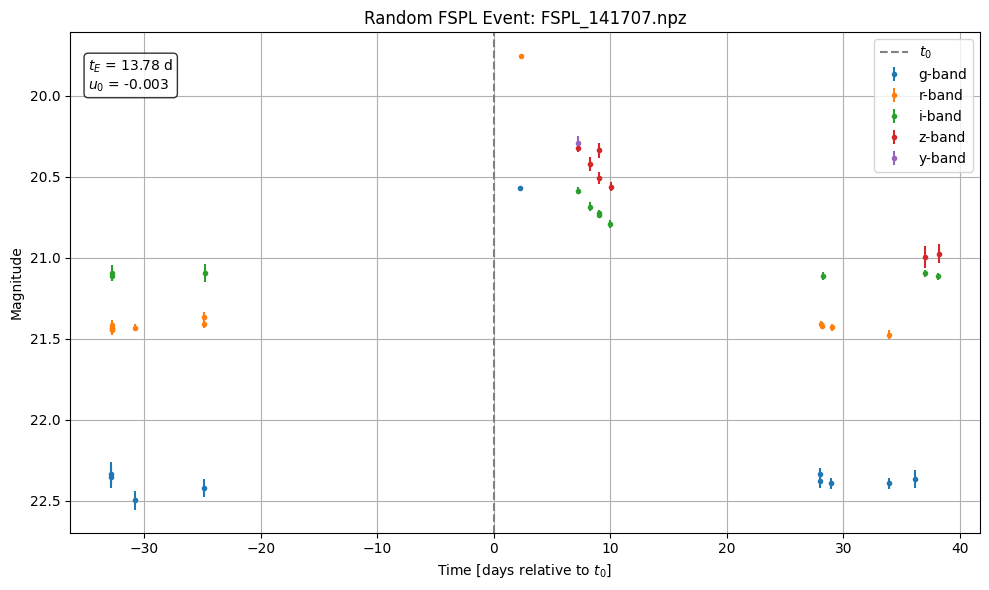

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# --- Path to your FSPL directory ---
fspl_dir = 'downloaded_file/microlensing_lightcurves/FSPL'

# --- Create a directory to save the plots ---
save_dir = "lightcurve_plots/FSPL"
os.makedirs(save_dir, exist_ok=True)

# --- List all available .npz files ---
all_files = [f for f in os.listdir(fspl_dir) if f.endswith('.npz')]
if not all_files:
    raise FileNotFoundError("No .npz files found in FSPL folder.")

# --- Try random files until a valid one is found ---
valid_file = None
while all_files:
    candidate = random.choice(all_files)
    file_path = os.path.join(fspl_dir, candidate)
    data = np.load(file_path)

    t0 = float(data['t0'])
    tE = float(data['tE'])
    u0 = float(data['u0'])
    zoom_range = 3 * tE

    filters = ['u', 'g', 'r', 'i', 'z', 'y']
    filter_count = 0
    total_points = 0

    for f in filters:
        try:
            t = data[f"{f}_time"] - t0
            mag = data[f"{f}_mag"]
            err_mag = data[f"{f}_err_mag"]
            mask = (t >= -zoom_range) & (t <= zoom_range)
            n_points = np.sum(mask)
            if n_points >= 1:
                filter_count += 1
                total_points += n_points
        except KeyError:
            continue

    if total_points >= 10 and filter_count >= 3:
        valid_file = file_path
        break
    else:
        all_files.remove(candidate)

if valid_file is None:
    raise RuntimeError("No valid FSPL event found with ≥10 points in ≥3 filters.")

# --- Plotting ---
data = np.load(valid_file)
t0 = float(data['t0'])
tE = float(data['tE'])
u0 = float(data['u0'])
zoom_range = 3 * tE

plt.figure(figsize=(10, 6))

for f in filters:
    try:
        t = data[f"{f}_time"] - t0
        mag = data[f"{f}_mag"]
        err_mag = data[f"{f}_err_mag"]

        mask = (t >= -zoom_range) & (t <= zoom_range)
        if np.sum(mask) == 0:
            continue

        t = t[mask]
        mag = mag[mask]
        err_mag = err_mag[mask]

        plt.errorbar(t, mag, yerr=err_mag, fmt='.', label=f"{f}-band")
    except KeyError:
        continue

plt.axvline(0, color='gray', linestyle='--', label='$t_0$')
plt.xlabel("Time [days relative to $t_0$]")
plt.ylabel("Magnitude")
plt.title(f"Random FSPL Event: {os.path.basename(valid_file)}")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()

plt.text(0.02, 0.95, f"$t_E$ = {tE:.2f} d\n$u_0$ = {u0:.3f}", 
         transform=plt.gca().transAxes, fontsize=10, va='top', ha='left',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.tight_layout()
event_name = os.path.splitext(os.path.basename(valid_file))[0]
save_path = os.path.join(save_dir, f"{event_name}.png")
plt.savefig(save_path)
plt.show()


> #### 4.3.2 Now we generate a random lightcurve for the PSPL events

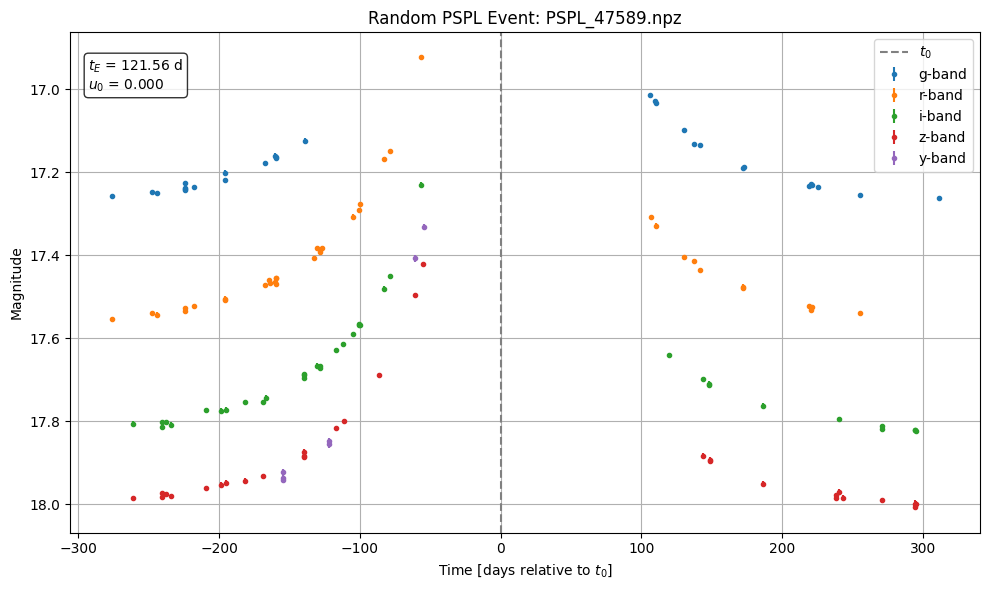

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

pspl_dir = 'downloaded_file/microlensing_lightcurves/PSPL'

# --- Create a directory to save the plots ---
save_dir = "lightcurve_plots/PSPL"
os.makedirs(save_dir, exist_ok=True)

all_files = [f for f in os.listdir(pspl_dir) if f.endswith('.npz')]
if not all_files:
    raise FileNotFoundError("No .npz files found in PSPL folder.")

valid_file = None
while all_files:
    candidate = random.choice(all_files)
    file_path = os.path.join(pspl_dir, candidate)
    data = np.load(file_path)

    try:
        t0 = float(data['t0'])
        tE = float(data['tE'])
        u0 = float(data['u0'])
    except KeyError:
        all_files.remove(candidate)
        continue

    filters = ['g', 'r', 'i', 'z', 'y']
    zoom_range = 3 * tE
    total_points = 0
    filter_count = 0

    for f in filters:
        try:
            t = data[f"{f}_time"] - t0
            mask = (t >= -zoom_range) & (t <= zoom_range)
            if np.sum(mask) > 0:
                filter_count += 1
                total_points += np.sum(mask)
        except KeyError:
            continue

    if total_points >= 10 and filter_count >= 3:
        valid_file = file_path
        break
    else:
        all_files.remove(candidate)

if valid_file is None:
    raise RuntimeError("No valid PSPL event found.")

# --- Plotting ---
data = np.load(valid_file)
t0 = float(data['t0'])
tE = float(data['tE'])
u0 = float(data['u0'])
zoom_range = 3 * tE

plt.figure(figsize=(10, 6))
for f in filters:
    try:
        t = data[f"{f}_time"] - t0
        mag = data[f"{f}_mag"]
        err_mag = data[f"{f}_err_mag"]
        mask = (t >= -zoom_range) & (t <= zoom_range)
        if np.sum(mask) == 0:
            continue
        plt.errorbar(t[mask], mag[mask], yerr=err_mag[mask], fmt='.', label=f"{f}-band")
    except KeyError:
        continue

plt.axvline(0, color='gray', linestyle='--', label='$t_0$')
plt.xlabel("Time [days relative to $t_0$]")
plt.ylabel("Magnitude")
plt.title(f"Random PSPL Event: {os.path.basename(valid_file)}")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()

# Annotation
plt.text(0.02, 0.95, f"$t_E$ = {tE:.2f} d\n$u_0$ = {u0:.3f}",
         transform=plt.gca().transAxes, fontsize=10, va='top', ha='left',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.tight_layout()
event_name = os.path.splitext(os.path.basename(valid_file))[0]
save_path = os.path.join(save_dir, f"{event_name}.png")
plt.savefig(save_path)
plt.show()


> #### 4.3.3 Nopw we generate a random lightcurve for the USBL events

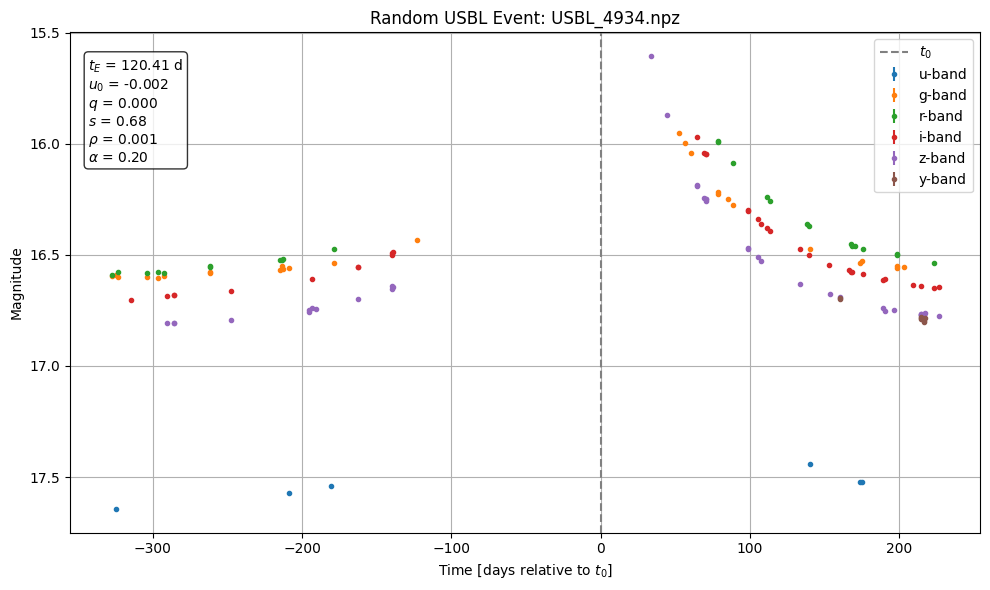

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

usbl_dir = 'downloaded_file/microlensing_lightcurves/USBL'

# --- Create a directory to save the plots ---
save_dir = "lightcurve_plots/USBL"
os.makedirs(save_dir, exist_ok=True)

all_files = [f for f in os.listdir(usbl_dir) if f.endswith('.npz')]
if not all_files:
    raise FileNotFoundError("No .npz files found in USBL folder.")

valid_file = None
while all_files:
    candidate = random.choice(all_files)
    file_path = os.path.join(usbl_dir, candidate)
    data = np.load(file_path)

    try:
        t0 = float(data['t0'])
        tE = float(data['tE'])
        u0 = float(data['u0'])
    except KeyError:
        all_files.remove(candidate)
        continue

    filters = ['u', 'g', 'r', 'i', 'z', 'y']
    zoom_range = 3 * tE
    total_points = 0
    filter_count = 0

    for f in filters:
        try:
            t = data[f"{f}_time"] - t0
            mask = (t >= -zoom_range) & (t <= zoom_range)
            if np.sum(mask) > 0:
                filter_count += 1
                total_points += np.sum(mask)
        except KeyError:
            continue

    if total_points >= 10 and filter_count >= 3:
        valid_file = file_path
        break
    else:
        all_files.remove(candidate)

if valid_file is None:
    raise RuntimeError("No valid USBL event found.")

# --- Plotting ---
data = np.load(valid_file)
t0 = float(data['t0'])
tE = float(data['tE'])
u0 = float(data['u0'])
zoom_range = 3 * tE

mass_ratio = data.get('mass_ratio', None)
separation = data.get('separation', None)
rho = data.get('rho', None)
alpha = data.get('alpha', None)

plt.figure(figsize=(10, 6))
for f in filters:
    try:
        t = data[f"{f}_time"] - t0
        mag = data[f"{f}_mag"]
        err_mag = data[f"{f}_err_mag"]
        mask = (t >= -zoom_range) & (t <= zoom_range)
        if np.sum(mask) == 0:
            continue
        plt.errorbar(t[mask], mag[mask], yerr=err_mag[mask], fmt='.', label=f"{f}-band")
    except KeyError:
        continue

plt.axvline(0, color='gray', linestyle='--', label='$t_0$')
plt.xlabel("Time [days relative to $t_0$]")
plt.ylabel("Magnitude")
plt.title(f"Random USBL Event: {os.path.basename(valid_file)}")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()

# --- Annotation box with USBL parameters ---
annotation = f"$t_E$ = {tE:.2f} d\n$u_0$ = {u0:.3f}"
if mass_ratio is not None:
    annotation += f"\n$q$ = {mass_ratio:.3f}"
if separation is not None:
    annotation += f"\n$s$ = {separation:.2f}"
if rho is not None:
    annotation += f"\n$\\rho$ = {rho:.3f}"
if alpha is not None:
    annotation += f"\n$\\alpha$ = {alpha:.2f}"

plt.text(0.02, 0.95, annotation,
         transform=plt.gca().transAxes, fontsize=10, va='top', ha='left',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.tight_layout()
event_name = os.path.splitext(os.path.basename(valid_file))[0]
save_path = os.path.join(save_dir, f"{event_name}.png")
plt.savefig(save_path)
plt.show()


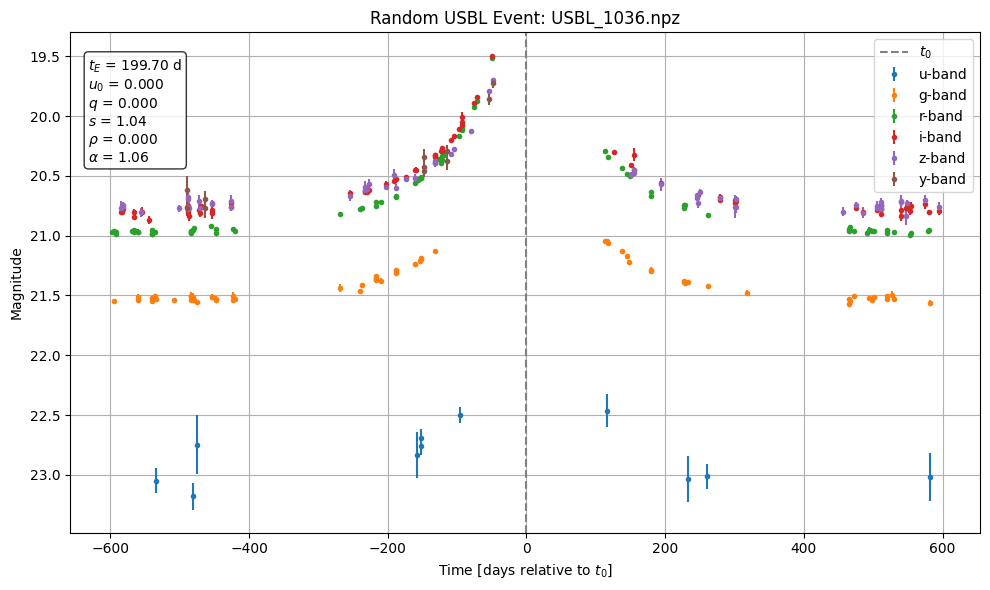

In [17]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

usbl_dir = 'downloaded_file/microlensing_lightcurves/USBL'

all_files = [f for f in os.listdir(usbl_dir) if f.endswith('.npz')]
if not all_files:
    raise FileNotFoundError("No .npz files found in USBL folder.")

valid_file = None
while all_files:
    candidate = random.choice(all_files)
    file_path = os.path.join(usbl_dir, candidate)
    data = np.load(file_path)

    try:
        t0 = float(data['t0'])
        tE = float(data['tE'])
        u0 = float(data['u0'])
    except KeyError:
        all_files.remove(candidate)
        continue

    filters = ['u', 'g', 'r', 'i', 'z', 'y']
    zoom_range = 3 * tE
    total_points = 0
    filter_count = 0

    for f in filters:
        try:
            t = data[f"{f}_time"] - t0
            mask = (t >= -zoom_range) & (t <= zoom_range)
            if np.sum(mask) > 0:
                filter_count += 1
                total_points += np.sum(mask)
        except KeyError:
            continue

    if total_points >= 20 and filter_count >= 3:
        valid_file = file_path
        break
    else:
        all_files.remove(candidate)

if valid_file is None:
    raise RuntimeError("No valid USBL event found.")

# --- Plotting ---
data = np.load(valid_file)
t0 = float(data['t0'])
tE = float(data['tE'])
u0 = float(data['u0'])
zoom_range = 3 * tE

mass_ratio = data.get('mass_ratio', None)
separation = data.get('separation', None)
rho = data.get('rho', None)
alpha = data.get('alpha', None)

plt.figure(figsize=(10, 6))
for f in filters:
    try:
        t = data[f"{f}_time"] - t0
        mag = data[f"{f}_mag"]
        err_mag = data[f"{f}_err_mag"]
        mask = (t >= -zoom_range) & (t <= zoom_range)
        if np.sum(mask) == 0:
            continue
        plt.errorbar(t[mask], mag[mask], yerr=err_mag[mask], fmt='.', label=f"{f}-band")
    except KeyError:
        continue

plt.axvline(0, color='gray', linestyle='--', label='$t_0$')
plt.xlabel("Time [days relative to $t_0$]")
plt.ylabel("Magnitude")
plt.title(f"Random USBL Event: {os.path.basename(valid_file)}")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()

# --- Annotation box with USBL parameters ---
annotation = f"$t_E$ = {tE:.2f} d\n$u_0$ = {u0:.3f}"
if mass_ratio is not None:
    annotation += f"\n$q$ = {mass_ratio:.3f}"
if separation is not None:
    annotation += f"\n$s$ = {separation:.2f}"
if rho is not None:
    annotation += f"\n$\\rho$ = {rho:.3f}"
if alpha is not None:
    annotation += f"\n$\\alpha$ = {alpha:.2f}"

plt.text(0.02, 0.95, annotation,
         transform=plt.gca().transAxes, fontsize=10, va='top', ha='left',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig("random_usbl_lightcurve.png")
plt.show()


> #### 5. Microlensing Lightcurve Data Conversion and Organization for running fits on RT Model 

This section of the workflow focuses on processing microlensing lightcurve data stored in `.npz` format. The purpose is to extract photometric data across multiple filters, convert galactic coordinates to equatorial coordinates, and organize the output data into structured folders with accompanying metadata.

---

###  **Overview of the Workflow**

- The input consists of multiple microlensing event models, specifically `FSPL`, `PSPL`, and `USBL`, each contained within its respective folder.
- Each folder contains `.npz` files, where each file represents a distinct microlensing event with photometric data across several filters: `u`, `g`, `r`, `i`, `z`, and `y`.
- The goal is to parse these files, convert the time series data into a human-readable `.dat` format, and write the sky coordinates for each event alongside the data.

---

###  **Coordinate Conversion**

- The script uses galactic coordinates `(l = 0.5°, b = -1.25°)` as input.
- These are converted into equatorial coordinates `(Right Ascension, Declination)` using Astropy's coordinate transformation tools.
- The resulting RA and Dec are formatted in a standardized string format:  
`HH:MM:SS.S +DD:MM:SS.S`
- This coordinate information is saved into a file named `event.coordinates` for each event, ensuring that each dataset includes its precise sky position.

---

###  **Directory and File Structure**

- The output is organized into a main `output` folder within the parent directory.
- For each event (identified by its filename), a subfolder is created following the structure:  
`output/EventName/Data/`
- Inside each `Data` folder:
  - A `event.coordinates` file contains the RA and Dec.
  - Separate `.dat` files exist for each photometric filter (`u`, `g`, `r`, `i`, `z`, `y`), named with the convention:  
  `RubinFilterband.dat`

---

###  **Time Conversion**

- The time data in the `.npz` files is originally in Julian Date (JD).
- To simplify, the script converts it to a relative Heliocentric Julian Date (HJD) by subtracting 2450000 from all time entries.

---

###  **Data Format and File Contents**

- Each output `.dat` file contains three columns:
  1. **Magnitude (Mag)** – The observed brightness in the specific filter.
  2. **Magnitude Error (err)** – The uncertainty associated with each magnitude measurement.
  3. **Time (HJD)** – The observation time in modified Heliocentric Julian Date.

- A header line `# Mag err HJD` is included at the top of each file to indicate the column meanings.

---

###  **Error Handling and Robustness**

- The script is robust against missing data:
  - If a specific filter's data is not present in a `.npz` file, the script detects it and prints a warning but continues processing the remaining filters.
  - General exceptions such as failed file reads are caught and logged with an error message, ensuring that one problematic file does not halt the entire process.

---

###  **Logging and Console Output**

- Throughout execution, the script provides informative logs:
  - It announces how many files are being processed for each event type.
  - It confirms when coordinate files and photometric `.dat` files are successfully saved.
  - It reports missing filters or any errors encountered during processing.

---

###  **Final Directory Example**

At the end of execution, the output folder looks like this:

```
microlensing_lightcurves/
├── FSPL/
│   └── *.npz
├── PSPL/
│   └── *.npz
├── USBL/
│   └── *.npz
└── output/
    ├── Event1/
    │   └── Data/
    │       ├── Rubinu.dat
    │       ├── Rubing.dat
    │       ├── ...
    │       └── event.coordinates
    └── Event2/
        └── Data/
            ├── ...
```

---

This process converts the microlensing lightcurve data for the RTModel runs by:

- Converting raw `.npz` datasets into clean, readable `.dat` files.
- Including sky position metadata with each dataset.
- Structuring the outputs in an organized folder hierarchy for easy access and further scientific analysis.

In [10]:
import numpy as np
import os
from glob import glob
from astropy.coordinates import SkyCoord
import astropy.units as u
from tqdm import tqdm

# Set the parent directory path where FSPL, PSPL, USBL folders are located
parent_dir = r"C:\Users\Meet\OneDrive\Desktop\Summer 2025\RTModel\jupyter\downloaded_file\microlensing_lightcurves"  # <-- Update your path if needed

# The microlensing event types (folders)
event_types = ['FSPL', 'PSPL', 'USBL']

# The filters
filters = ['u', 'g', 'r', 'i', 'z', 'y']

# Galactic coordinates (example)
galactic_l = 0.5   # degrees
galactic_b = -1.25 # degrees

# Convert Galactic to Equatorial (RA, Dec)
coord = SkyCoord(l=galactic_l * u.degree, b=galactic_b * u.degree, frame='galactic')
ra_str = coord.icrs.ra.to_string(unit=u.hour, sep=':', precision=1, pad=True)
dec_str = coord.icrs.dec.to_string(unit=u.deg, sep=':', precision=1, alwayssign=True, pad=True)
coordinate_string = f"{ra_str} {dec_str}"

# Output directory
output_dir = os.path.join(parent_dir, 'output')
os.makedirs(output_dir, exist_ok=True)

# Loop over each event type folder with progress bar
for event_type in tqdm(event_types, desc='Event Types'):
    folder_path = os.path.join(parent_dir, event_type)
    npz_files = glob(os.path.join(folder_path, '*.npz'))

    # tqdm over files in event type
    for file_path in tqdm(npz_files, desc=f'{event_type} Files', leave=False):
        try:
            data = np.load(file_path)
            filename_base = os.path.splitext(os.path.basename(file_path))[0]

            # Create event-specific directory: output/EventName/Data
            event_output_dir = os.path.join(output_dir, filename_base, 'Data')
            os.makedirs(event_output_dir, exist_ok=True)

            # Write the coordinates file
            coord_file = os.path.join(event_output_dir, 'event.coordinates')
            with open(coord_file, 'w') as cf:
                cf.write(coordinate_string + '\n')

            # Process each filter
            for f in filters:
                try:
                    mag = data[f'{f}_mag']
                    err_mag = data[f'{f}_err_mag']
                    time = data[f'{f}_time'] - 2450000  # Apply time correction

                    # Stack as columns: Mag, Error, HJD
                    final_array = np.column_stack([mag, err_mag, time])

                    # Output filename
                    output_file = os.path.join(
                        event_output_dir, f"Rubin{f}band.dat"
                    )

                    # Save .dat file
                    np.savetxt(
                        output_file,
                        final_array,
                        fmt='%.6f',
                        header='Mag err HJD',
                        comments='# '
                    )

                except KeyError:
                    continue  # If filter data is missing, skip

        except Exception:
            continue  # Skip file if error reading

    print(f'{event_type} complete.')

print('All folders processed successfully.')


Event Types:   0%|          | 0/3 [00:00<?, ?it/s]

Event Types:  33%|███▎      | 1/3 [25:25<50:50, 1525.40s/it]

FSPL complete.


Event Types:  67%|██████▋   | 2/3 [1:03:17<32:44, 1964.52s/it]

PSPL complete.


Event Types: 100%|██████████| 3/3 [1:16:07<00:00, 1522.64s/it]

USBL complete.
All folders processed successfully.


> ##### 5.1 Now we will tar compress this incase someone just wants to use the models on a cluster

In [13]:
# Compress with maximum efficiency
!tar -cJf output.tar.xz downloaded_file/microlensing_lightcurves/output

> #### 6. Import RT Model to start working with the model files

In [14]:
import RTModel

> #### 7. Test the number of processors available to use for RTModel

In [15]:
rtm = RTModel.RTModel()

*********************
****   RTModel   ****
*********************
Number of processors: 16


> #### 8. Run the event model for a sample event to check the fits

> #### 8.1 Set the eventname 

In [18]:
eventname = r"C:\Users\Meet\OneDrive\Desktop\Summer 2025\RTModel\jupyter\downloaded_file\microlensing_lightcurves\output\FSPL_7" 
rtm.set_event(eventname)

> #### 8.2 Run the event 

In [ ]:
rtm.run()

o Sat Jun 28 23:21:52 2025
- Analyzing event:  C:\Users\Meet\OneDrive\Desktop\Summer 2025\RTModel\jupyter\downloaded_file\microlensing_lightcurves\output\FSPL_7
- Launching: Reader
  Pre-processing data...
  OK
o Sat Jun 28 23:21:53 2025
- Launching: InitCond
  Setting initial conditions...
Peaks:  11964.7500  13082.4700  
  OK
o Sat Jun 28 23:21:53 2025
- Single-lens-Single-source fits
Fits completed:  53%|█████▎    | 64/120 [40:19<35:16, 37.80s/it]  

KeyboardInterrupt: 

> #### 9. Run the model looping through all the possible events with atleast data files for 3 filters and 20 points

In [ ]:
import os
from glob import glob

# Parent output directory
output_dir = r"C:\Users\Meet\OneDrive\Desktop\Summer 2025\RTModel\jupyter\downloaded_file\microlensing_lightcurves\output"

# Get all event folders inside output (e.g., FSPL_7, PSPL_3, etc.)
event_folders = [os.path.join(output_dir, d) for d in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, d))]

# Loop through each event
for event_folder in event_folders:
    data_folder = os.path.join(event_folder, 'Data')

    if os.path.exists(data_folder):
        # Find all .dat files in Data folder
        dat_files = glob(os.path.join(data_folder, 'Rubin*band.dat'))

        # Check if at least 3 filters are present
        if len(dat_files) >= 3:
            total_points = 0

            # Count the total number of data points across all filters
            for file in dat_files:
                with open(file, 'r') as f:
                    # Skip header lines and count data lines
                    lines = [line for line in f if line.strip() and not line.startswith("#")]
                    total_points += len(lines)

            if total_points >= 20:
                print(f"Processing event: {os.path.basename(event_folder)} with {len(dat_files)} filters and {total_points} data points")

                # Loop through the events in the output directory
                rtm.set_event(event_folder)

                # Run the model for this event
                rtm.run()
            else:
                print(f"Skipping {os.path.basename(event_folder)} - only {total_points} data points available")
        else:
            print(f"Skipping {os.path.basename(event_folder)} - only {len(dat_files)} filters available")
    else:
        print(f"Skipping {os.path.basename(event_folder)} - Data folder missing")

print("Finished processing all valid events.")


Skipping FSPL_10000 - only 1 filters available
Skipping FSPL_100000 - only 2 filters available
Skipping FSPL_100010 - only 1 filters available
Skipping FSPL_100018 - only 1 filters available
Skipping FSPL_100019 - only 1 filters available
Skipping FSPL_10002 - only 2 filters available
Skipping FSPL_100023 - only 1 filters available
Skipping FSPL_100028 - only 2 filters available
Skipping FSPL_100035 - only 1 filters available
Skipping FSPL_100042 - only 1 filters available
Skipping FSPL_100047 - only 1 filters available
Processing event: FSPL_100051 with 6 filters
o Sun Jun 29 00:17:13 2025
- Analyzing event:  C:\Users\Meet\OneDrive\Desktop\Summer 2025\RTModel\jupyter\downloaded_file\microlensing_lightcurves\output\FSPL_100051
- Launching: Reader
  Pre-processing data...
  OK
o Sun Jun 29 00:17:13 2025
- Launching: InitCond
  Setting initial conditions...
Peaks:  13082.7800  11179.8400  
  OK
o Sun Jun 29 00:17:14 2025
- Single-lens-Single-source fits


KeyboardInterrupt: 